# Multi-Dimensional Scaling (MDS)

\begin{equation}
\min_Y \mid D^{(X)} - D^{(Y)} \mid ^2
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
n_points = 2000
X, color = datasets.samples_generator.make_swiss_roll(n_points,0.01, random_state=0)

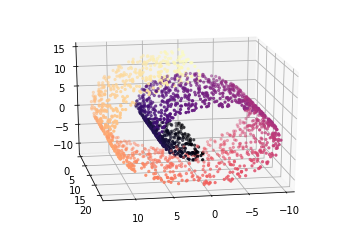

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color,marker='.', cmap='magma')
ax.view_init(20, 80)
plt.show()

## The Multi-Dimensional Scaling (MDS) Algorithm
- Compute the matrix of squared pairwise similarities $D, D_{ij} = \| x _i - x_j\|^2$

In [4]:
data = X
ndata = np.shape(data)[0]
ndim = np.shape(data)[1]
d = np.zeros((ndata,ndata),dtype=float)

# Compute the distance matrix
for i in range(ndata):
    for j in range(i+1,ndata):
        for k in range(ndim):
            d[i,j] += (data[i,k] - data[j,k])**2
        d[i,j] = np.sqrt(d[i,j])
        d[j,i] = d[i,j]
d = d**2

- Compute $J = I_N −1/N$ (where $I_N$ is the $N×N$ identity function and $N$ is the number of datapoints)

In [5]:
J = np.eye(ndata) - np.ones((ndata, ndata))/ndata
J.shape

(2000, 2000)

- Compute $B = -\frac{1}{2} JDJT$

In [6]:
B = -J.dot(d).dot(J.T)/2
B.shape

(2000, 2000)

- Find the $L$ largest eigenvalues $\lambda_i$ of $B$, together with the corresponding eigenvectors $e_i$

In [7]:
evals, evecs = np.linalg.eigh(B)
evals = np.real(evals)
# Sort by eigenvalue in descending order                                                  
idx   = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:,idx]


In [8]:
evals.shape

(2000,)

- Put the eigenvalues into a diagonal matrix $V$ and set the eigenvectors to be columns of matrix $P$

In [9]:
import warnings
warnings.filterwarnings('ignore')
V  = np.diag(np.absolute(np.sqrt(evals)))
P  = evecs
Y  = P.dot(V)

In [10]:
Y.shape

(2000, 2000)

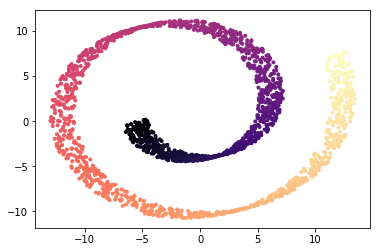

In [11]:
trans_data = Y[:,0:2]
plt.scatter(trans_data[:, 0], trans_data[:, 1], c=color, marker='.', cmap='magma')
plt.show()

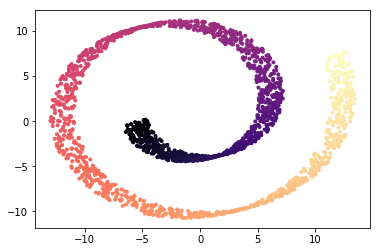

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
Y = pca.transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, marker='.', cmap='magma')

plt.show()

## Real Dataset

In [13]:
from sklearn import manifold
iris = datasets.load_iris()
data = iris.data
K = 10
iso = manifold.MDS(K, 2).fit_transform(data)

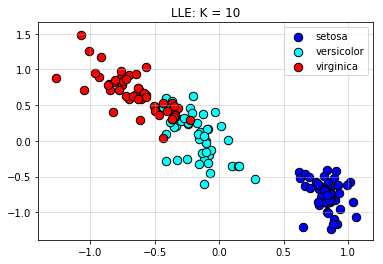

In [14]:
colors = ['b', 'aqua', 'red']


target_ids = np.unique(iris.target)
t = iris.target
for i, c ,label in zip(target_ids, colors, iris.target_names):
    plt.scatter(iso[ i == t,0], iso[i == t,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title('LLE: K = '+ str(K))
plt.grid(alpha=0.5)
plt.show()

## References

[1] T. Cox and M. Cox. Multidimensional Scaling. Chapman Hall, Boca Raton, 2nd edition, 2001.